<a href="https://colab.research.google.com/github/jclucasalves/mvp-machine-learning-analytics/blob/main/mvp_machine_learning_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MPV - Sprint: Machine Learning & Analytics**

Aluno: Lucas Alves Moreira

Dataset escolhido: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

Link Github: https://github.com/jclucasalves/mvp-machine-learning-analytics.git


Link do Drive: https://drive.google.com/drive/folders/1MmVekvkqRmoSG7MYKQ61ltaDNiUQ5uJb?usp=sharing

# Definição do problema

1. Qual é a descrição do problema?
> O problema consiste em prever a presença de doença cardíaca em pacientes com base em variáveis clínicas, como idade, sexo, tipo de dor no peito, níveis de colesterol, pressão arterial em repouso, entre outros. Trata-se de um problema de classificação binária, onde o objetivo é determinar se um paciente tem (1) ou não tem (0) a doença, utilizando modelos de aprendizado de máquina e deep learning para criar uma solução precisa e eficiente.
2. Você tem premissas ou hipóteses sobre o problema? Quais?
> Sim, as premissas incluem que as variáveis clínicas fornecidas são relevantes para prever a doença cardíaca, que os modelos podem identificar padrões mensuráveis para classificação, e que normalização e seleção de features adequadas aprimoram o desempenho dos modelos.
3. Que restrições ou condições foram impostas para selecionar os dados?
> Dados que reepresentam um problema na realizade.
5. Defina cada um dos atributos do dataset.
> - age: idade
> - sex: sexo (1= homem e 0=mulher)
> - cp (4 values): tipo de dor no peito (4 valores)
> - trestbps: pressão arterial em repouso
> - chol: colesterol sérico em mg/dl
> - fbs: glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)
> - restecg: resultados do eletrocardiograma em repouso (valores 0, 1, 2)
> - thalach: frequência cardíaca máxima alcançada
> - exang: angina induzida por exercício (1 = sim; 0 = não)
> - oldpeak: depressão do segmento ST induzida por exercício em relação ao repouso
> - slope: inclinação do segmento ST no pico do exercício
> - ca: número de vasos principais (0-3) coloridos por fluoroscopia
> - thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível (talassemia)

# Análise de Dados

## Dataset

In [77]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [78]:
#Carregando os dados no Colab

dataset = "https://raw.githubusercontent.com/jclucasalves/mvp-machine-learning-analytics/refs/heads/main/heart%20kaggle.csv"
df_coracao = pd.read_csv(dataset)


# Processamento dos dados

In [79]:
#mostrando as 5 primeiras linhas do dataset
df_coracao.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [80]:
#encontrando as colunas
df_coracao.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Há valores faltantes, discrepantes ou inconsistentes?

In [81]:
#encontrando as características do dataset
df_coracao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [82]:
#verificando a existencia de valroes nulos
df_coracao.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [83]:
#verificando a existencia de linhas diplicadas
df_coracao.duplicated().sum()

#notamos que há 723 linhas duplicadas que devem ser excluidas do dataset.
#caso essas informações permaneçam no modelo causará um peso desproporcional no treinamento do modelo -> overfitting

723

In [84]:
#excluindo as linhas duplicadas
df_coracao = df_coracao.drop_duplicates()

In [85]:
#encontrar o número de linhas e colunas dos dados
df_coracao.shape

(302, 14)

#### Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

In [86]:
#encontrando as "estatísticas" do dataset
df_coracao.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
# Calcula a porcentagem de homens
porcentagem_homens = (df_coracao['sex'].sum() / len(df_coracao)) * 100

# Calcula a porcentagem de mulheres
porcentagem_mulheres = 100 - porcentagem_homens

# Imprime as porcentagens
print(f"Porcentagem de homens: {porcentagem_homens:.2f}%")
print(f"Porcentagem de mulheres: {porcentagem_mulheres:.2f}%")

#distribuição por sexo
print(df_coracao.groupby('sex').size())
#(1= homem e 0=mulher)

Porcentagem de homens: 68.21%
Porcentagem de mulheres: 31.79%
sex
0     96
1    206
dtype: int64


#### Visualizações

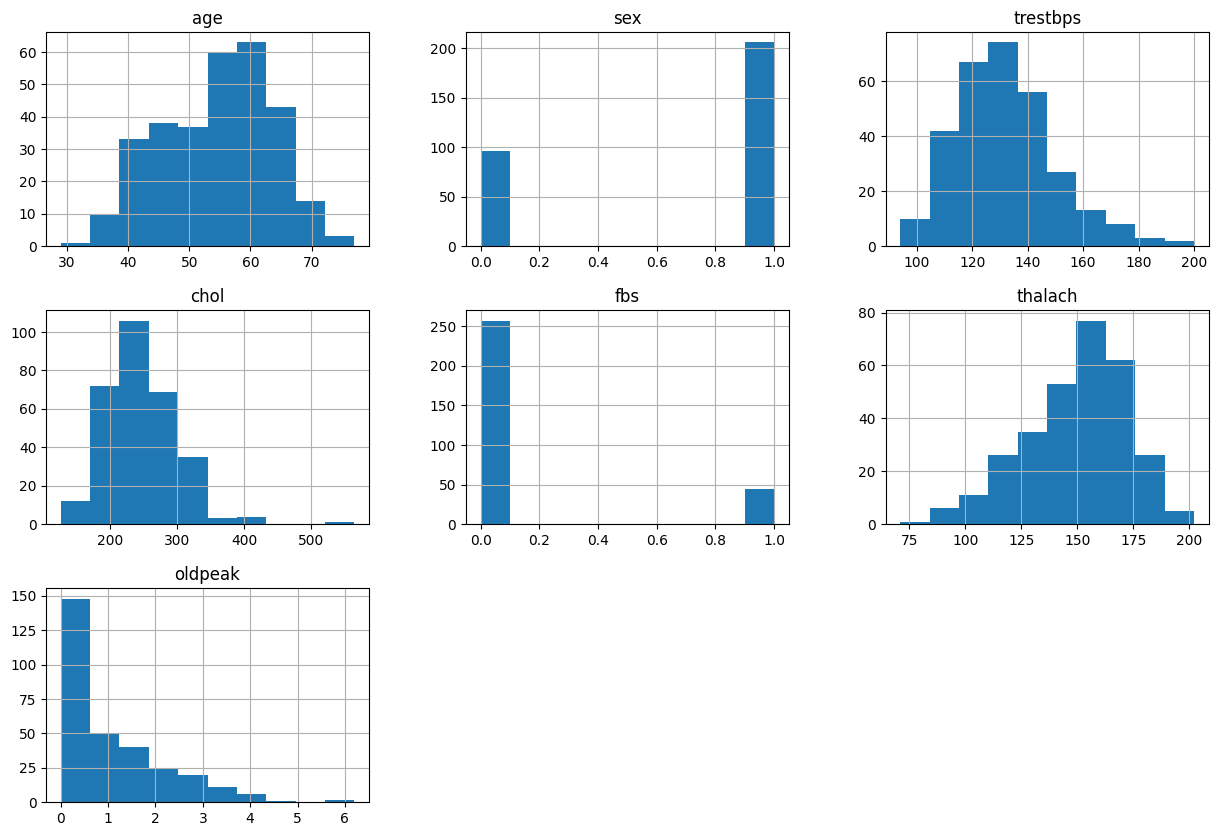

In [88]:
#Histograma dos atriibutos
df_resumo = df_coracao[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak']] #selecionando os campos para análise gráfica

df_resumo.hist(figsize = (15,10))
plt.show()

#Serve para identificar a distribuição de cada atributo do dataset

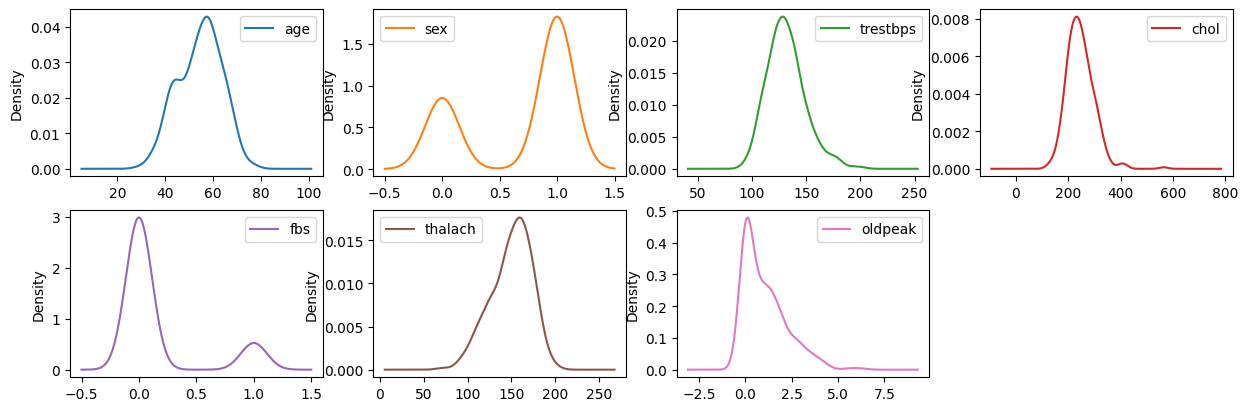

In [89]:
# Distribuição dos atriibutos
df_resumo.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

#Ajuda a identificar a distribuição de cada atributo do dataset
#com visualização em linhas

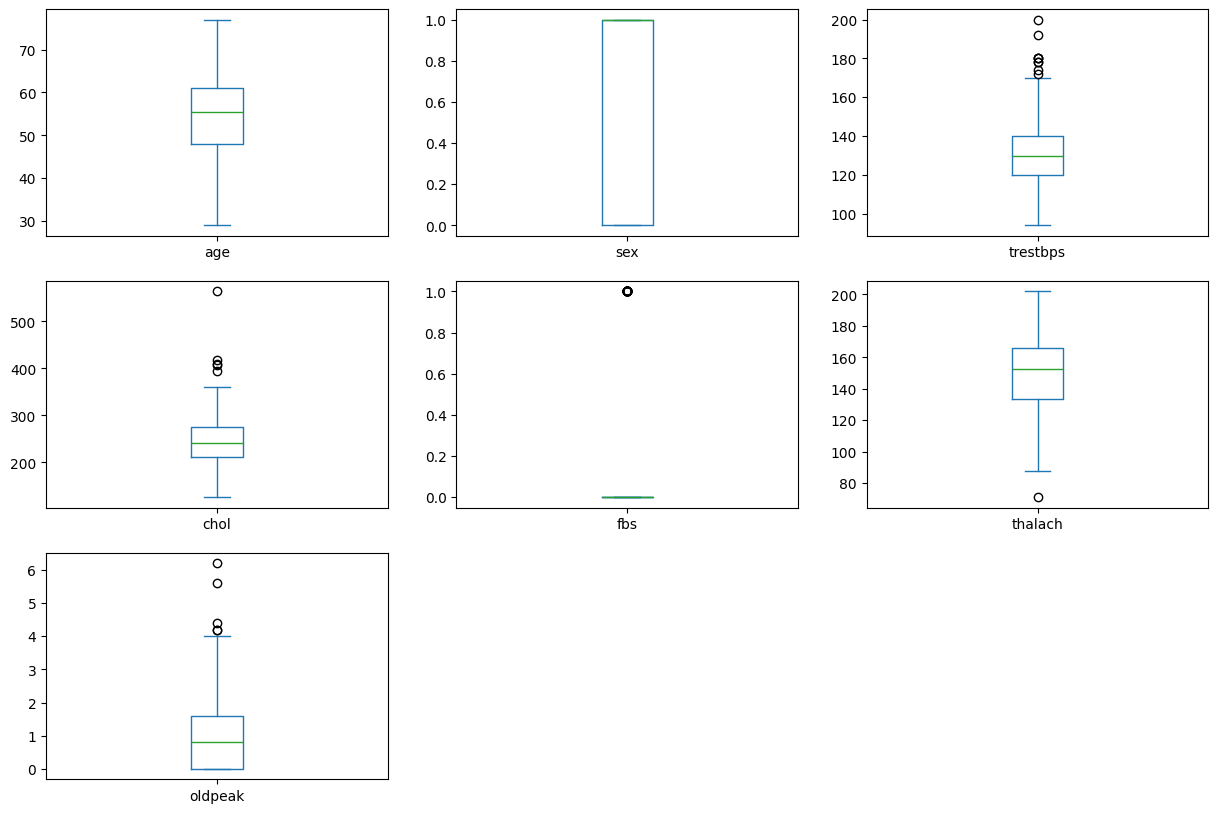

In [90]:
# Boxplot
df_resumo.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

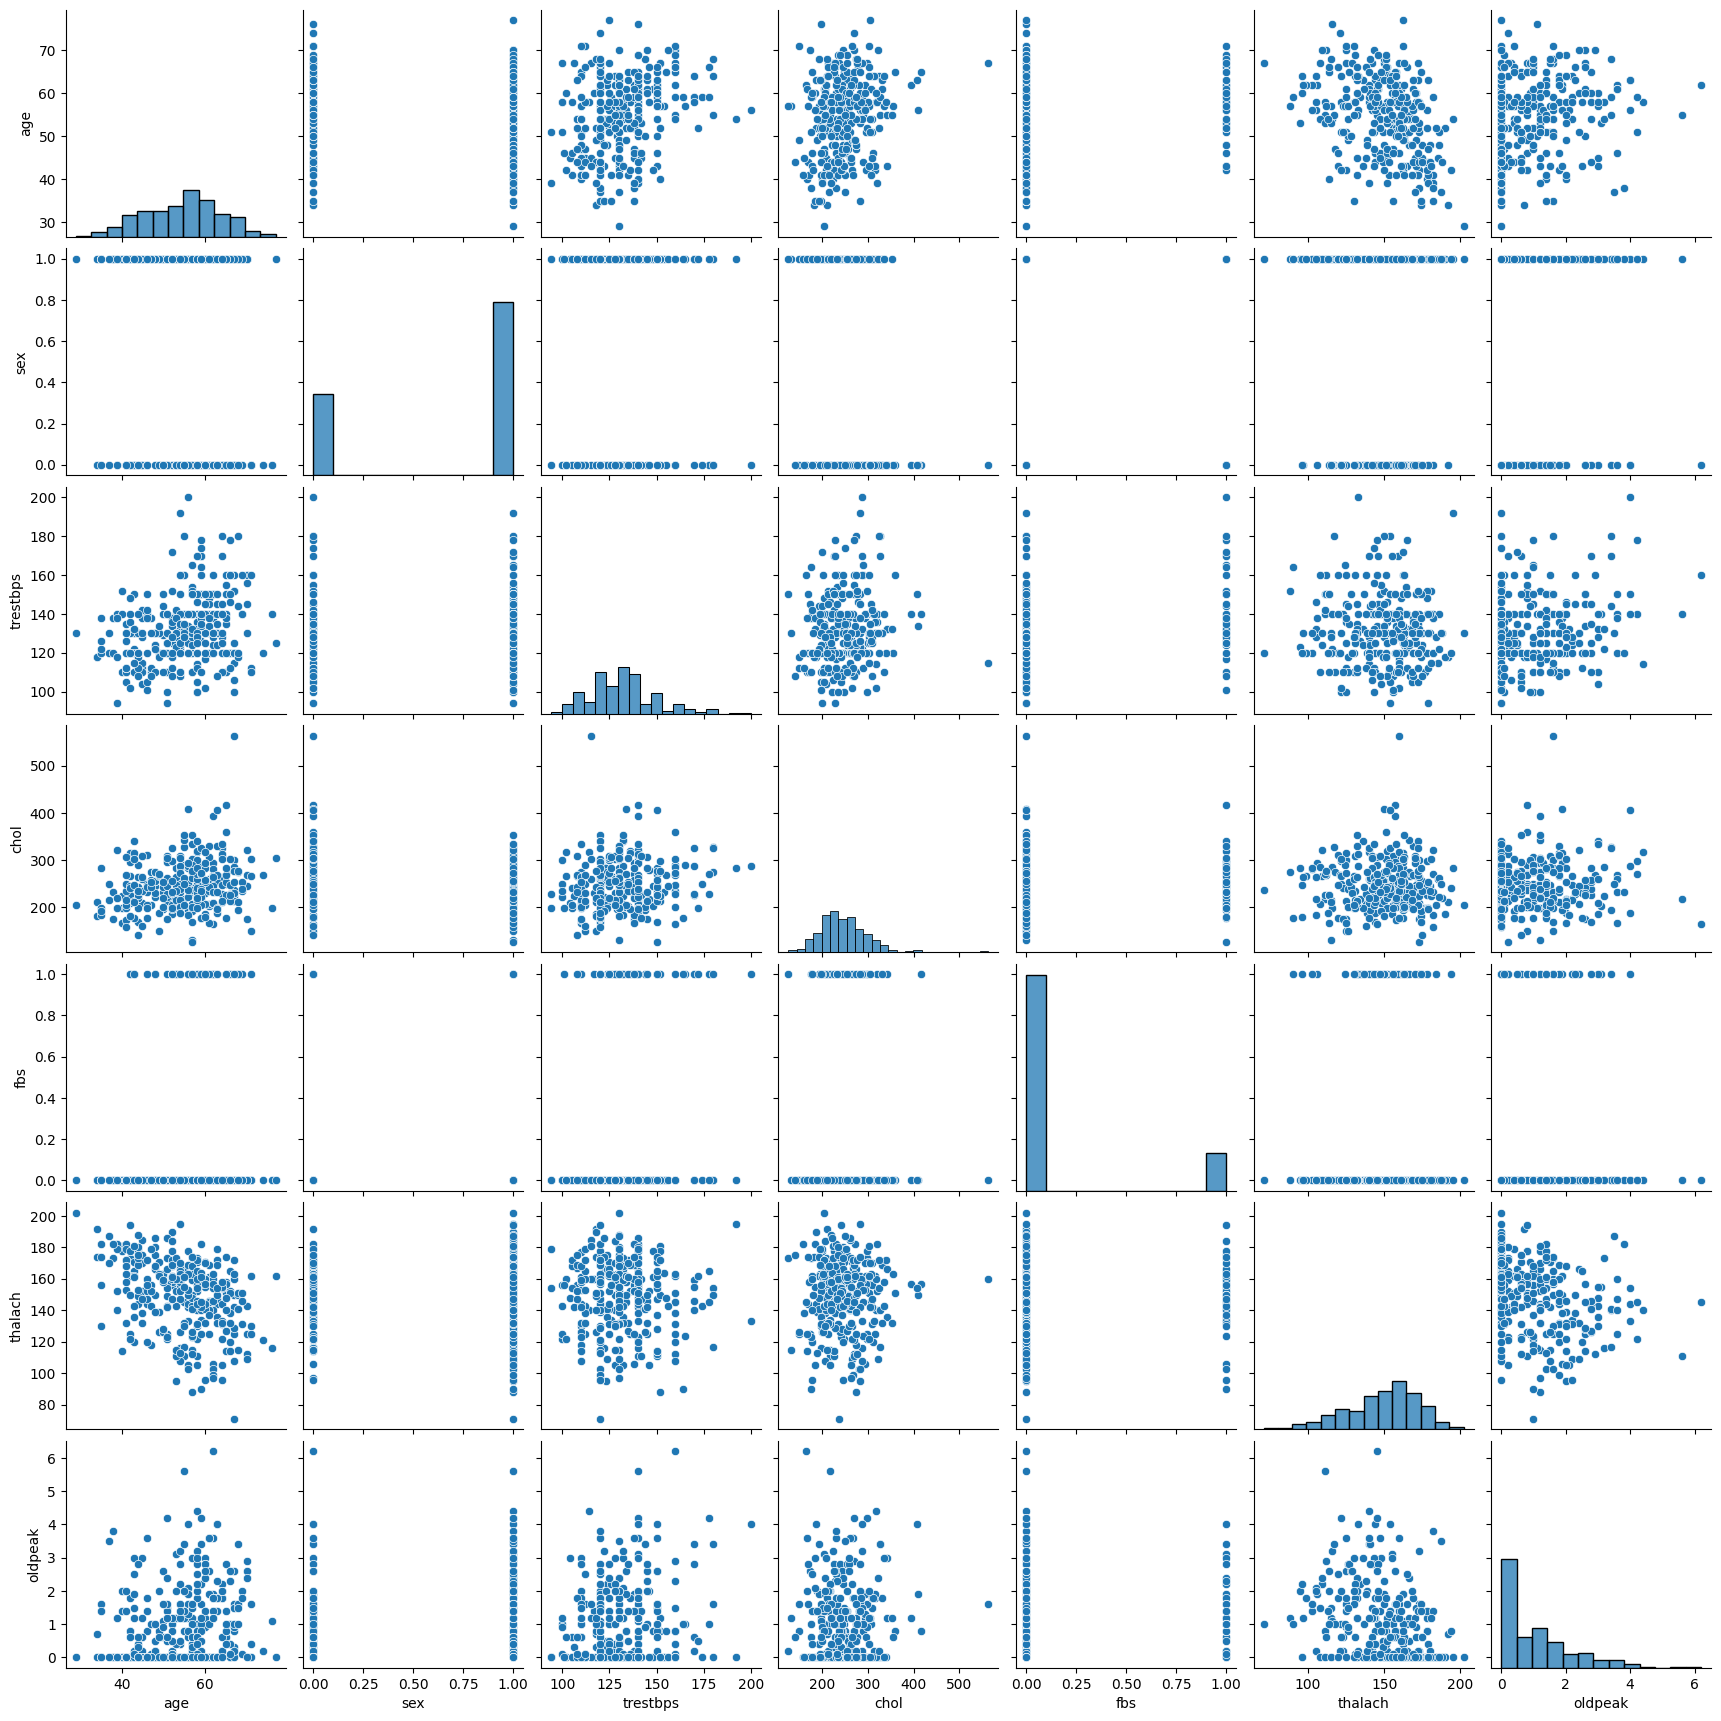

In [91]:
# Scatter Plot com Seaborn - Por Atributos

sns.pairplot(df_resumo)

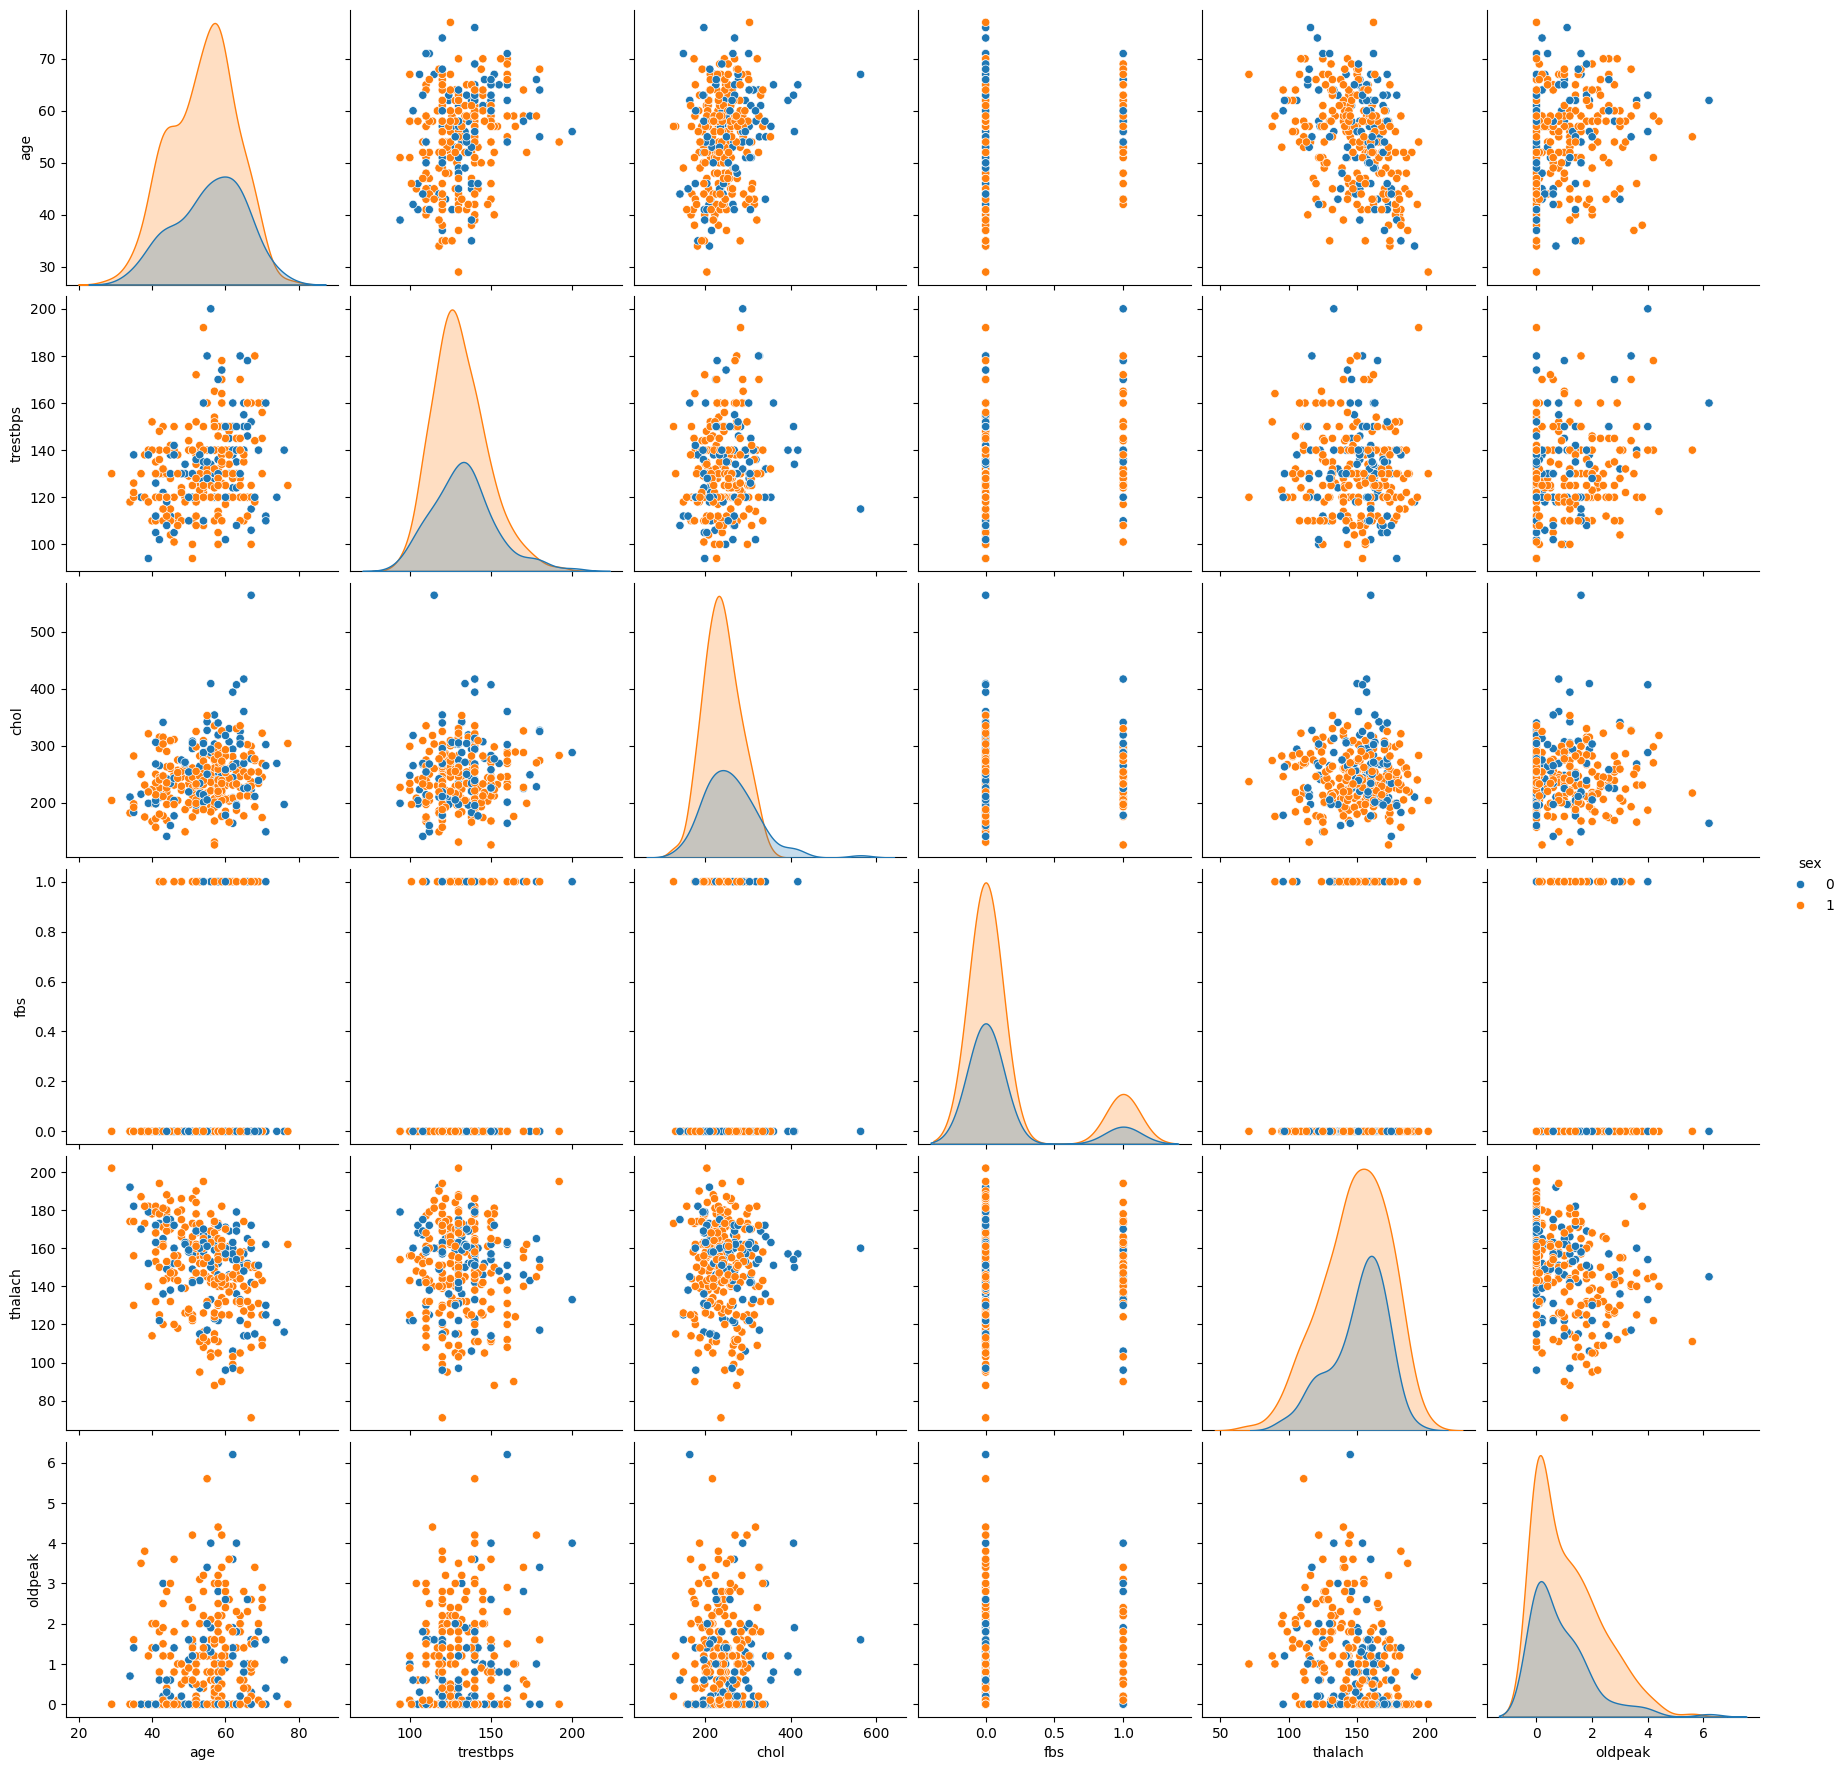

In [92]:
# Scatter Plot com Seaborn - Por Atributos

sns.pairplot(df_resumo, hue = "sex", height = 3);

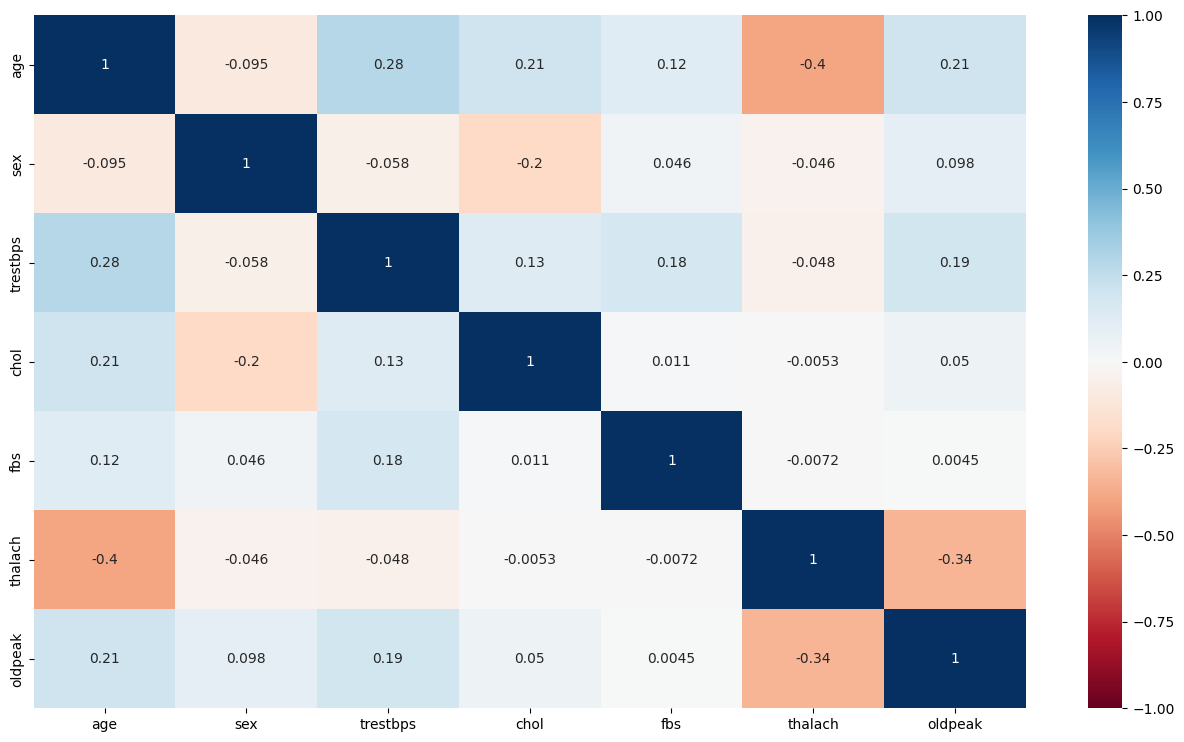

In [93]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [16, 9]
matriz_correlacao=df_resumo.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='RdBu', vmin=-1, vmax=1)  #realiza o plot da matriz de correlação
plt.show()

# Modelo ML

## Parâmetros Iniciais

In [94]:
# Separando o conjunto de dados em features (X) e target (y)
X = df_coracao.drop('target', axis=1)
y = df_coracao['target']

In [95]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% para teste e 80% para treino

In [97]:
# Normalizando os dados para ter média 0 e desvio padrão 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Selecionando as 10 melhores features
selector = SelectKBest(f_classif, k=10)
X_train_scaled_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_scaled_selected = selector.transform(X_test_scaled)

#é usado para ajustar o selector aos dados de treino e selecionar as melhores características, aplicando essa seleção para reduzir o conjunto de treino

## Treinamento e Avaliação dos Modelos

In [99]:
# Inicializando os modelos de aprendizado de máquina que serão usados
models = [
    ("Regressão Logística", LogisticRegression(random_state=42)),
    ("Árvore de Decisão", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Support Vector Machine", SVC(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

In [100]:
# Loop para treinar e avaliar cada modelo
for name, model in models:
    # Treinamento do modelo com o conjunto de treino
    model.fit(X_train_scaled_selected, y_train)

    # Previsões com o modelo no conjunto de teste
    y_pred = model.predict(X_test_scaled_selected)

    # Cálculo da acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)

    # Cálculo do F1 Score do modelo
    f1 = f1_score(y_test, y_pred)

    # Cálculo da acurácia validada cruzada do modelo
    cv_accuracy = cross_val_score(model, X_train_scaled_selected, y_train, cv=5, scoring='accuracy').mean()

    # Impressão dos resultados
    print(f"{name}:")
    print(f"  Acurácia: {accuracy:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia Validada Cruzada: {cv_accuracy:.2f}\n")

Regressão Logística:
  Acurácia: 0.80
  F1 Score: 0.80
  Acurácia Validada Cruzada: 0.81

Árvore de Decisão:
  Acurácia: 0.70
  F1 Score: 0.69
  Acurácia Validada Cruzada: 0.73

Random Forest:
  Acurácia: 0.84
  F1 Score: 0.84
  Acurácia Validada Cruzada: 0.81

Support Vector Machine:
  Acurácia: 0.85
  F1 Score: 0.85
  Acurácia Validada Cruzada: 0.80

K-Nearest Neighbors:
  Acurácia: 0.84
  F1 Score: 0.84
  Acurácia Validada Cruzada: 0.81



### Comentário:

O código apresentado implementa um loop para treinar e avaliar vários modelos de machine learning utilizando a técnica de seleção de características pré-processadas (X_train_scaled_selected). Para cada modelo listado no loop (models), o modelo é treinado com os dados de treino, realiza previsões no conjunto de teste, calcula a acurácia e o F1 Score para avaliar o desempenho, e ainda calcula a acurácia validada cruzada utilizando 5 dobras de validação cruzada.

Modelos como o Random Forest e Support Vector Machine apresentaram melhores métricas, como uma acurácia mais alta e F1 Score superior, indicando que são mais eficazes em prever as classes no conjunto de teste. A Regressão Logística também mostrou um desempenho sólido, mas a Árvore de Decisão apresentou um desempenho inferior.

## Otimização de Hiperparâmetros

In [71]:
# Otimização dos hiperparâmetros do modelo Random Forest
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 10, 20, 30, 40, 50]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled_selected, y_train)
best_rf = grid_search.best_estimator_

# Avaliação do modelo Random Forest otimizado
y_pred = best_rf.predict(X_test_scaled_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cv_accuracy = cross_val_score(best_rf, X_train_scaled_selected, y_train, cv=5, scoring='accuracy').mean()

# Impressão dos resultados
print("Random Forest (otimizado):")
print(f"  Acurácia: {accuracy:.2f}")
print(f"  F1 Score: {f1:.2f}")
print(f"  Acurácia Validada Cruzada: {cv_accuracy:.2f}\n")

Random Forest (otimizado):
  Acurácia: 0.85
  F1 Score: 0.85
  Acurácia Validada Cruzada: 0.81



### Comentário:

O código realiza a otimização dos hiperparâmetros do modelo RandomForestClassifier usando uma busca em grade (GridSearchCV). Ele explora diferentes combinações de n_estimators (número de árvores) e max_depth (profundidade máxima das árvores). A busca em grade é realizada com validação cruzada de 5 dobras usando os dados de treino pré-processados (X_train_scaled_selected e y_train). Após a otimização, o melhor modelo é escolhido e utilizado para fazer previsões no conjunto de teste, além de calcular suas métricas de acurácia e F1 Score. Os resultados indicam que o modelo Random Forest otimizado apresentou um desempenho significativamente melhor em comparação com o modelo não otimizado, com uma acurácia de 0.85 e F1 Score de 0.85, mostrando uma maior capacidade de generalização e precisão.

## Modelo de Deep Learning

In [105]:
# Definição do modelo de deep learning
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#definição do modelo de rede neural usando a biblioteca Keras.
#estrutura sequencial com três camadas: 32 neurônios usando a função de ativação ReLU
#camada de saída com apenas um neurônio com a função de ativação sigmoid

In [107]:
# Compilação do modelo de deep learning
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [108]:
# Treinamento do modelo de deep learning
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

In [109]:
# Avaliação do modelo de deep learning no conjunto de treino e de teste
_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

# Impressão dos resultados
print(f"Acurácia de Treino: {train_acc:.2f}")
print(f"Acurácia de Teste: {test_acc:.2f}")

Acurácia de Treino: 0.99
Acurácia de Teste: 0.75


### Comentário:

Os resultados mostram uma acurácia de 0.99 no conjunto de treino, indicando que o modelo se ajustou bem aos dados de treino, mas uma acurácia de apenas 0.75 no conjunto de teste, sugerindo que o modelo não está generalizando bem para novos dados. Isso indica que o modelo está superajustado aos dados de treino para o modelo de deep learning aplicado.